In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_excel("/kaggle/input/superstore-usadataset/Superstore_USA.xlsx")

In [3]:
dataset.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


In [4]:
dataset.shape

(9426, 24)

In [5]:
#identify missing values
dataset.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [6]:
# fillout the missing value
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace=True)

/tmp/ipykernel_33/1884495521.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace=True)


In [7]:
# now here again check that, is there any null value
dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [8]:
#from customer segment identify the order priority such as high or low 
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [9]:
#here we replace 'Critical ' with 'Critical'
dataset['Order Priority'] = dataset['Order Priority'].replace('Critical ','Critical')

In [10]:
#To get unique data
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

# Order Priority

In [11]:
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

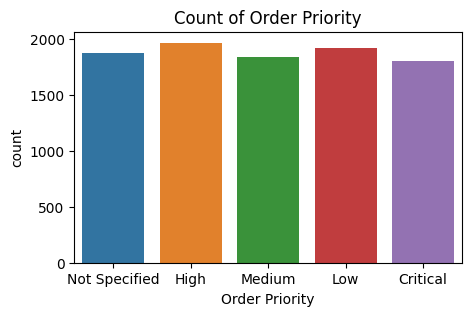

In [12]:
#now make the graph of countplot using seaborn and then showing the graph 
plt.figure(figsize=(5,3))  #fix the size of graphty, t
sns.countplot(x="Order Priority",data=dataset)    #on the place of x axis we input the order priorihen the data we taken from input that dataset
plt.title("Count of Order Priority")
plt.savefig("Count of Order Priority.jpg")
plt.show()

# Shiping mode
in which shipping mode, the product is used to sell

In [13]:
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [14]:
x = dataset['Ship Mode'].value_counts().index
y = dataset['Ship Mode'].value_counts().values

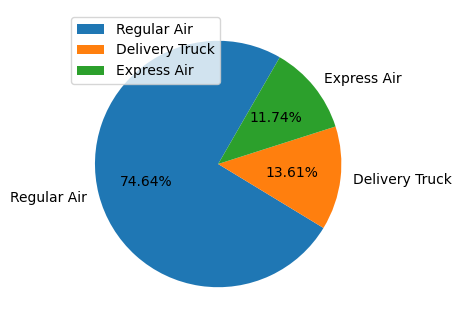

In [15]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,startangle = 60,autopct="%0.2f%%")
plt.legend(loc=2)
plt.show()

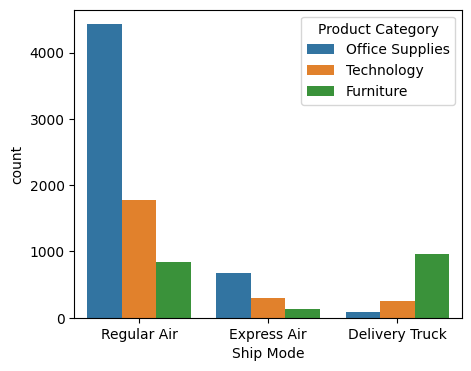

In [16]:
#how much order deliver through ship mode
plt.figure(figsize=(5,4))
sns.countplot(x='Ship Mode',data=dataset,hue="Product Category")
plt.show()

# Customer Segment
in customer segment which type of customer base comes from such as corporate 
or in e-commerce platform which type of customer base came grom 

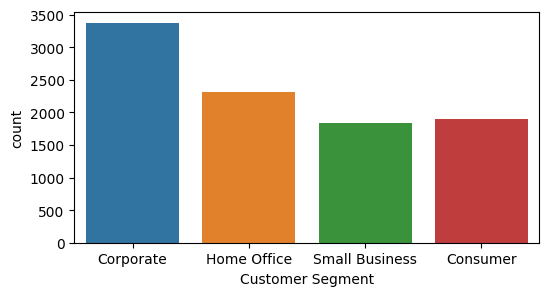

In [17]:
plt.figure(figsize=(6,3))
sns.countplot(x='Customer Segment',data=dataset)
plt.show()    

#in this we get the information of that the customer is maximum from corporate level

# Product Category
in ecomerce, the maximum no.of sale products

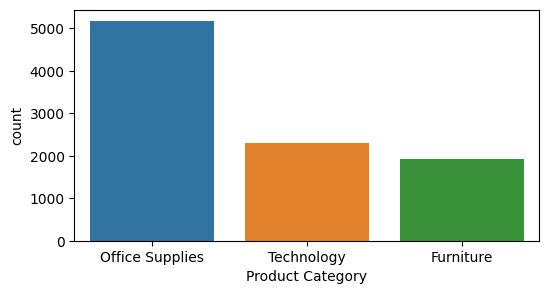

In [18]:
plt.figure(figsize=(6,3))
sns.countplot(x='Product Category',data=dataset)
plt.show() 

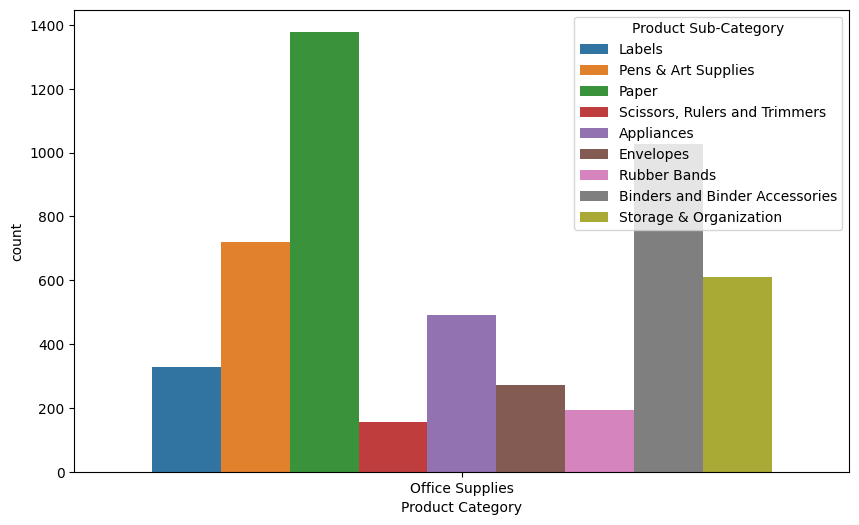

In [19]:
#High selling product in office supplies
plt.figure(figsize=(10,6))
sns.countplot(x='Product Category',data=dataset[dataset["Product Category"]=="Office Supplies"],hue='Product Sub-Category')
plt.show() 

in which year how much sell

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [21]:
#here we can seperate the year
dataset["Order year"] = dataset['Order Date'].dt.year

In [22]:
dataset.info() #here we check , order year column add or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [23]:
#in which year how much sell occur
dataset['Order year'].value_counts()

Order year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

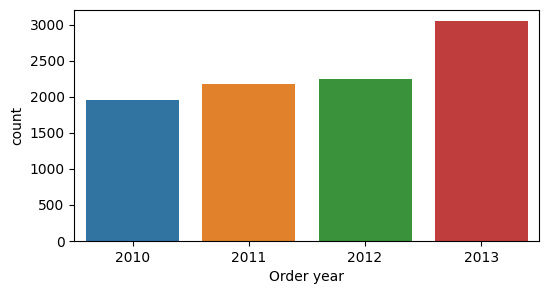

In [24]:
plt.figure(figsize=(6,3))
sns.countplot(x='Order year',data=dataset)
plt.show()

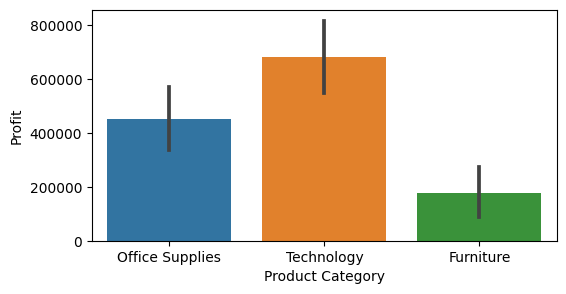

In [25]:
#In which Category, how much profit have been seen
plt.figure(figsize=(6,3))
sns.barplot(x="Product Category",y="Profit",data=dataset,estimator='sum')
plt.show()

In [26]:
#in which State, how much sales or order placed
dataset['State or Province'].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

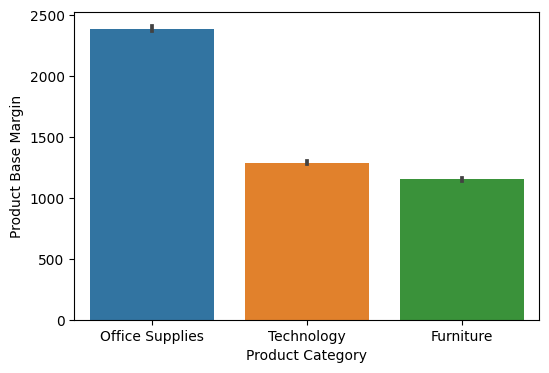

In [27]:
#in which product have how much product base margin
plt.figure(figsize=(6,4))
sns.barplot(x="Product Category",y="Product Base Margin",data=dataset,estimator='sum')
plt.show()